<a href="https://colab.research.google.com/github/LindsClar/SpringOne/blob/main/Relax_Inc_Take_Home_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/takehome_user_engagement.csv')
df.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [3]:
df.shape

(207917, 3)

In [4]:
#how many Users
df['user_id'].nunique()

8823

In [5]:
#attempts
len(df['user_id'])

207917

In [6]:
# convert time_stamp into datetime format
df['time_stamp'] = pd.to_datetime(
   df['time_stamp'], format='%Y-%m-%d %H:%M:%S'
)

Defining an "adopted user" as a user who has logged into the product on three separate
days in at least one seven­day period , identify which factors predict future user
adoption .

In [7]:
def logins_in_days(df, days=7, logins=3):
    from datetime import timedelta
    df['date'] = df['time_stamp'].dt.date
    df = df.drop_duplicates(subset='date').sort_values('date')
    passed_days = df['date'].diff(periods=logins-1)
    return any(passed_days <= timedelta(days=days))

In [8]:
adopted_users = df.groupby('user_id').apply(logins_in_days)

In [9]:
adopted_users.name = 'adopted_user'

In [10]:
# num of adopted Users
sum(adopted_users)

1656

In [11]:
#total Users
len(adopted_users)

8823

In [12]:
adopted_users.head()

,adopted_user
user_id,
1,False
2,True
3,False
4,False
5,False


In [13]:
df_2 = pd.read_csv('/content/takehome_users.csv', encoding='latin1')
df_2.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [14]:
df_2.shape

(12000, 10)

In [15]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [16]:
df_2.describe()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,8.823000e+03,12000.000000,12000.000000,12000.000000,6417.000000
mean,6000.50000,1.379279e+09,0.249500,0.149333,141.884583,5962.957145
std,3464.24595,1.953116e+07,0.432742,0.356432,124.056723,3383.761968
min,1.00000,1.338452e+09,0.000000,0.000000,0.000000,3.000000
25%,3000.75000,1.363195e+09,0.000000,0.000000,29.000000,3058.000000
50%,6000.50000,1.382888e+09,0.000000,0.000000,108.000000,5954.000000
75%,9000.25000,1.398443e+09,0.000000,0.000000,238.250000,8817.000000
max,12000.00000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000


In [17]:
df_2['creation_time'] = pd.to_datetime(
    df_2['creation_time'], format='%Y-%m-%d %H:%M:%S')

In [18]:
import time
current_timestamp = time.time()
df_2_filtered = df_2[df_2['last_session_creation_time'] < current_timestamp]

In [19]:
df_2_filtered['last_session_creation_time'] = pd.to_datetime(df_2_filtered['last_session_creation_time'], unit='s')
print(df_2_filtered['last_session_creation_time'].head())

0   2014-04-22 03:53:30
1   2014-03-31 03:45:04
2   2013-03-19 23:14:52
3   2013-05-22 08:09:28
4   2013-01-22 10:14:20
Name: last_session_creation_time, dtype: datetime64[ns]


In [20]:
df_2_filtered['org_id'].nunique()

417

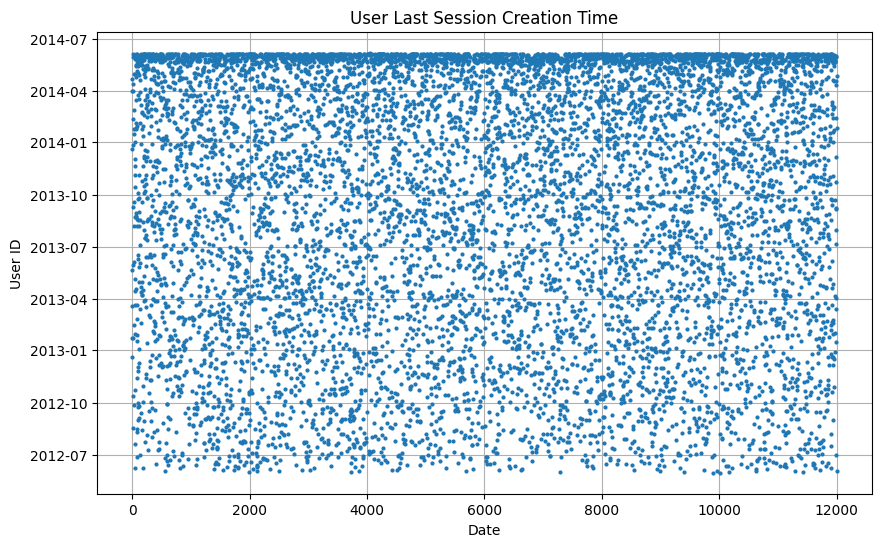

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(df_2_filtered['object_id'], df_2_filtered['last_session_creation_time'], 'o', markersize=2)
plt.title('User Last Session Creation Time')
plt.xlabel('Date')
plt.ylabel('User ID')
plt.grid(True)
plt.show()

In [22]:
df_2_filtered['history'] = df_2_filtered['last_session_creation_time'] - df_2_filtered['creation_time']
df_2_filtered['history'] = df_2_filtered['history'].dt.days

In [23]:
df_2_filtered['history'].head()

,history
0,0
1,136
2,0
3,1
4,5


In [24]:
df_2_filtered.info

<bound method DataFrame.info of        object_id       creation_time               name  \
0              1 2014-04-22 03:53:30     Clausen August   
1              2 2013-11-15 03:45:04      Poole Matthew   
2              3 2013-03-19 23:14:52  Bottrill Mitchell   
3              4 2013-05-21 08:09:28    Clausen Nicklas   
4              5 2013-01-17 10:14:20          Raw Grace   
...          ...                 ...                ...   
11995      11996 2013-09-06 06:14:15       Meier Sophia   
11996      11997 2013-01-10 18:28:37      Fisher Amelie   
11997      11998 2014-04-27 12:45:16        Haynes Jake   
11998      11999 2012-05-31 11:55:59       Faber Annett   
11999      12000 2014-01-26 08:57:12         Lima Thaís   

                            email     creation_source  \
0        AugustCClausen@yahoo.com        GUEST_INVITE   
1          MatthewPoole@gustr.com          ORG_INVITE   
2      MitchellBottrill@gustr.com          ORG_INVITE   
3       NicklasSClausen@yahoo.com        GUEST_INVITE   
4              GraceRaw@yahoo.com        GUEST_INVITE   
...                           ...                 ...   
11995       SophiaMeier@gustr.com          ORG_INVITE   
11996      AmelieFisher@gmail.com  SIGNUP_GOOGLE_AUTH   
11997         JakeHaynes@cuvox.de        GUEST_INVITE   
11998          mhaerzxp@iuxiw.com   PERSONAL_PROJECTS   
11999   ThaisMeloLima@hotmail.com              SIGNUP   

      last_session_creation_time  opted_in_to_mailing_list  \
0            2014-04-22 03:53:30                         1   
1            2014-03-31 03:45:04                         0   
2            2013-03-19 23:14:52                         0   
3            2013-05-22 08:09:28                         0   
4            2013-01-22 10:14:20                         0   
...                          ...                       ...   
11995        2013-09-06 06:14:15                         0   
11996        2013-01-15 18:28:37                         0   
11997        2014-04-27 12:45:16                         1   
11998        2012-06-02 11:55:59                         0   
11999        2014-01-26 08:57:12                         0   

       enabled_for_marketing_drip  org_id  invited_by_user_id  history  
0                               0      11             10803.0        0  
1                               0       1               316.0      136  
2                               0      94              1525.0        0  
3                               0       1              5151.0        1  
4                               0     193              5240.0        5  
...                           ...     ...                 ...      ...  
11995                           0      89              8263.0        0  
11996                           0     200                 NaN        5  
11997                           1      83              8074.0        0  
11998                           0       6                 NaN        2  
11999                           1       0                 NaN        0  

[8823 rows x 11 columns]>

In [25]:
df_2_filtered.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,history
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,136
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,1
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,5


In [26]:
#dropping
df_2_filtered = df_2_filtered.drop(['creation_time', 'last_session_creation_time'], axis=1)

In [27]:
full_data = pd.merge(df_2_filtered, adopted_users, left_index=True, right_index=True)

In [28]:
full_data.head()

,object_id,name,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,history,adopted_user
1,2,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,0,0,1,316.0,136,False
2,3,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,0,0,94,1525.0,0,True
3,4,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,0,0,1,5151.0,1,False
4,5,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,0,0,193,5240.0,5,False
5,6,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,0,0,197,11241.0,2,False


In [38]:
full_data['is_organization'] = full_data['org_id'].notnull().astype('int')

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [40]:
print(full_data.head())

   object_id               name                          email  \
1          2      Poole Matthew         MatthewPoole@gustr.com   
2          3  Bottrill Mitchell     MitchellBottrill@gustr.com   
3          4    Clausen Nicklas      NicklasSClausen@yahoo.com   
4          5          Raw Grace             GraceRaw@yahoo.com   
5          6      Cunha Eduardo  EduardoPereiraCunha@yahoo.com   

  creation_source  opted_in_to_mailing_list  enabled_for_marketing_drip  \
1      ORG_INVITE                         0                           0   
2      ORG_INVITE                         0                           0   
3    GUEST_INVITE                         0                           0   
4    GUEST_INVITE                         0                           0   
5    GUEST_INVITE                         0                           0   

   org_id  invited_by_user_id  history  adopted_user  is_organization  
1       1               316.0      136         False                1  
2      9

In [41]:
X = full_data[['history', 'is_organization', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip']]
y = full_data['adopted_user']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [45]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.84      1.00      0.91      1087
        True       0.00      0.00      0.00       208

    accuracy                           0.84      1295
   macro avg       0.42      0.50      0.46      1295
weighted avg       0.70      0.84      0.77      1295



The percision indicates that 84% were not adopted Users and model identifies it 100% correctly for non adopted Users. The f1 score indicates that there is a high balance between the two metrics. This model highly indicates an ability to predict non adopted Users but there will need to be more analysis on the adopted Users and other modeling.